In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from data import spectra_paths, bran_z, bran_disc
import pandas as pd
import os
import numpy as np
from astropy.time import Time
from plots import big_fontsize, fig_width, fontsize

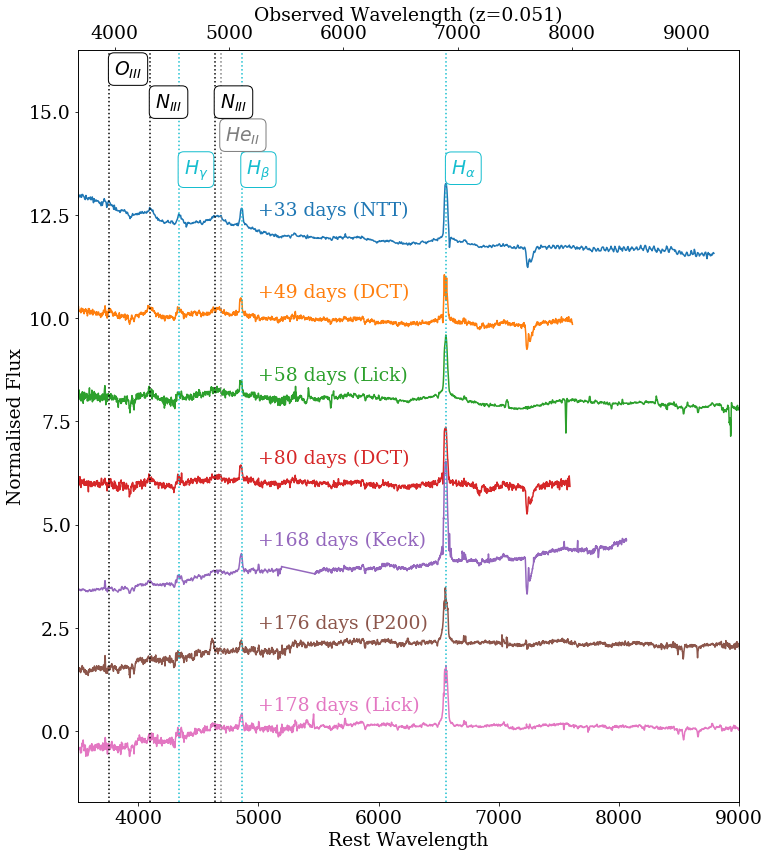

In [11]:
exp_times = {
    "ZTF19aapreis_20190513_NTT_v1.ascii": 900, # From TNS
    "ZTF19aapreis_20191003_P200_v1.ascii": 1450
}

redshift = 1 + bran_z


plt.figure(figsize=(1.8*fig_width, 2*fig_width))
ax1 = plt.subplot(111)
j = 0

# Redo with actual numbers, not Robert-on-train-reads-off-plot

cols = ["C9", "C7", "k", "k"]
# cols = [":", "--", "-.", "-"]

lines = [
    (r"$H_{\alpha}$", 6562.8, 0),
    (r"$H_{\beta}$", 4861, 0),
    (r"$H_{\gamma}$", 4340, 0),
    (r"$He_{II}$", 4686, 1),
    (r"$N_{III}$", 4640, 2),
    (r"$N_{III}$", 4100, 2),
    (r"$O_{III}$", 3760, 3)
]

for path in spectra_paths:
    name = os.path.basename(path).split("_")
    vetos = ["P60"]
    
    raw_date = name[1]
    date = Time(f"{raw_date[:4]}-{raw_date[4:6]}-{raw_date[6:]}T00:00:00.00", format='isot', scale='utc')
    n_days = date.mjd - bran_disc.mjd
    
    if np.sum([x in name for x in vetos]) == 0:
        data = pd.read_table(path, names=["wl", "flux", "flux_err"], sep=" ", comment='#')
        mask = data["flux"] > 0.
        data = data[mask]
        label = f"+{n_days:.0f} days ({name[2][:4]})"
        y_pos = 11. - float(j)
        
        plt.plot(data["wl"]/redshift, y_pos + data["flux"]/np.mean(data["flux"]), label=label)
        plt.annotate(label, (5000., y_pos + 1.5), color=f"C{int(j/2)}", fontsize=big_fontsize)
        j += 2.0
# plt.yscale("log")
# plt.legend(fontsize=big_fontsize)

for (label, wl, col) in lines:
    plt.axvline(wl, linestyle=":", color=cols[col])
    
    bbox = dict(boxstyle="round", fc="white", ec=cols[col])
    
    plt.annotate(label, (wl + 40., 13.5 + 0.8*col), fontsize=big_fontsize, bbox=bbox, color=cols[col])

plt.ylabel("Normalised Flux", fontsize=big_fontsize)
ax1.set_ylim(top=16.5)
ax1b = ax1.twiny()
ax1.set_xlim(left=3500, right=9000)
rslim = ax1.get_xlim()
ax1b.set_xlim((rslim[0] * redshift, rslim[1] * redshift))
ax1.set_xlabel(r"Rest Wavelength", fontsize=big_fontsize)
ax1b.set_xlabel(rf"Observed Wavelength (z={bran_z:.3f})", fontsize=big_fontsize)
ax1.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax1b.tick_params(axis='both', which='major', labelsize=big_fontsize)
plt.tight_layout()
plt.savefig("plots/spectra.pdf")